### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing Data

In [1550]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1551]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1552]:
# Importing and inspecting the dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1553]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [1554]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1555]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1556]:
# checking the number of unique values in all the cols. If a column has 90% or more the one single value we delete that column.
for cols in leads_data.columns:
    print(f"column name : {cols} :  no of unique values --> {leads_data[cols].nunique()}\n")
    print(leads_data[cols].value_counts().sort_index())
    print("---------------------------------------------\n\n")
    

column name : Prospect ID :  no of unique values --> 9240

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
0006d10a-eb01-4ba9-92e2-ad78588b2a40    1
0011be30-fa97-465b-8e44-0ae83dff7eed    1
0011f23e-9fd9-4256-b316-efc2e2639b0d    1
001b0ad3-9096-4af8-8205-912f5c6dafd8    1
                                       ..
ffec8e24-0c99-4345-89f1-e3ad6689764f    1
fff076a3-fe95-4c79-9401-e15846be8086    1
fff49ad0-6015-448c-a7cc-f454c39ffdda    1
fff4f056-6574-4f97-b85a-ea4198a2915b    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------


column name : Lead Number :  no of unique values --> 9240

Lead Number
579533    1
579538    1
579545    1
579546    1
579564    1
         ..
660681    1
660719    1
660727    1
660728    1
660737    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------


column name : Lead Origin :  no of unique values --> 5

Lead Origin
API                 

In [1557]:
# removing columns of no significant importance
leads_data.drop(columns=['Prospect ID','Do Not Email','Do Not Call','What matters most to you in choosing a course',
                                    'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                                   'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                                    'Get updates on DM Content','I agree to pay the amount through cheque'],inplace=True,axis=1)

# we delete the 'Prospect ID' column also since it is of no use in the analysis

In [1558]:
# replacing the value 'Select' as a missing value in cols
leads_data.City.replace('Select',np.nan,inplace=True)
leads_data.Specialization.replace('Select',np.nan,inplace=True)
leads_data['How did you hear about X Education'].replace('Select',np.nan,inplace=True)
leads_data['Lead Profile'].replace('Select',np.nan,inplace=True)

In [1559]:
# Calculating percentage of null values in all the remaining cols
(100*leads_data.isnull().mean()).sort_values(ascending=False)

How did you hear about X Education        78.463203
Lead Profile                              74.188312
Lead Quality                              51.590909
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Score                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Index                45.649351
City                                      39.707792
Specialization                            36.580087
Tags                                      36.287879
What is your current occupation           29.112554
Country                                   26.634199
Page Views Per Visit                       1.482684
TotalVisits                                1.482684
Last Activity                              1.114719
Lead Source                                0.389610
A free copy of Mastering The Interview     0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Total Time S

In [1560]:
# Dropping columns with missing values more than or equal to 35%
leads_data.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Profile Index',
                         'Asymmetrique Activity Index','Asymmetrique Activity Score','City','Tags','Specialization'],axis=1,inplace=True)

In [1561]:
# Missing values in columns 'What is your current occupation','Country' should be replaced by the mean, median or 
# mode value whichever applicable
leads_data[['What is your current occupation','Country']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   What is your current occupation  6550 non-null   object
 1   Country                          6779 non-null   object
dtypes: object(2)
memory usage: 144.5+ KB


Since both the above columns are of object type , we need to replace the missing values in these columns by their respective mode value

In [1563]:
cols_wid_missingvalues=['What is your current occupation','Country']

In [1564]:
# replacing the missing values with modes of the respective cols
for i in cols_wid_missingvalues:
    leads_data[i].fillna(leads_data[i].mode()[0],axis=0,inplace=True)

In [1565]:
# dropping rows in columns where missing value percentage is too low
leads_data.dropna(subset=['Page Views Per Visit','TotalVisits','Last Activity','Lead Source'],axis=0,inplace=True)

In [1566]:
# checking missing values again in cols
100*(leads_data.isnull().mean())

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now there are no missing values in the dataset. 

In [1568]:
# checking shape of the dataframe
leads_data.shape

(9074, 12)

#### Converting the binary variables (Yes/No) to 0/1

In [1570]:
# Applying a binary map function
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0}).astype('object')

In [1571]:
print(leads_data.columns)

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [1572]:
# renaming the column names
leads_data.rename(columns={'Total Time Spent on Website':'Web_Time','Page Views Per Visit':'Page_Views','What is your current occupation':'Occupation',
                           'A free copy of Mastering The Interview':'Interview_Copy','Last Notable Activity':'Last_Notable_Act'},inplace=True)

In [1573]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Web_Time,Page_Views,Last Activity,Country,Occupation,Interview_Copy,Last_Notable_Act
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,Modified


In [1574]:
# dropping some more insignificant columns
leads_data.drop(columns=['Last_Notable_Act'],axis=1,inplace=True)

In [1575]:
leads_data=leads_data[['Lead Number','Lead Origin', 'Lead Source', 'TotalVisits', 'Web_Time',
       'Page_Views', 'Last Activity', 'Country', 'Occupation',
       'Interview_Copy','Converted']]

In [1576]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,TotalVisits,Web_Time,Page_Views,Last Activity,Country,Occupation,Interview_Copy,Converted
0,660737,API,Olark Chat,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,0
1,660728,API,Organic Search,5.0,674,2.5,Email Opened,India,Unemployed,0,0
2,660727,Landing Page Submission,Direct Traffic,2.0,1532,2.0,Email Opened,India,Student,1,1
3,660719,Landing Page Submission,Direct Traffic,1.0,305,1.0,Unreachable,India,Unemployed,0,0
4,660681,Landing Page Submission,Google,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,1


### Univariate Analysis

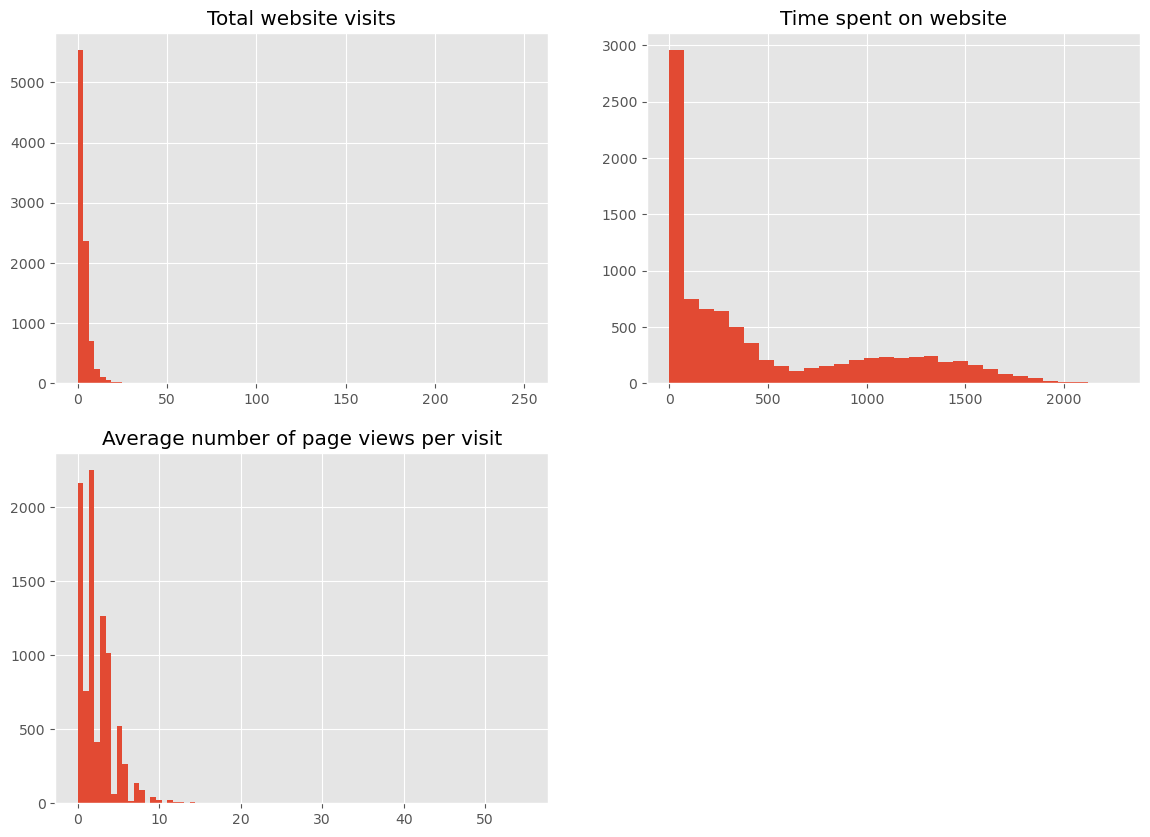

In [1578]:
# Numerical columns
# Set style
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(leads_data.TotalVisits, bins = 80)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(leads_data.Web_Time, bins = 30)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(leads_data.Page_Views, bins = 80)
plt.title('Average number of page views per visit')

plt.show()

In [1579]:
num_cols=leads_data.select_dtypes(include='number').columns
cat_cols=leads_data.select_dtypes(include='object').columns
print(f'numeric columns\n{num_cols}')
print()
print(f'categorical columns\n{cat_cols}')

numeric columns
Index(['Lead Number', 'TotalVisits', 'Web_Time', 'Page_Views', 'Converted'], dtype='object')

categorical columns
Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Occupation',
       'Interview_Copy'],
      dtype='object')


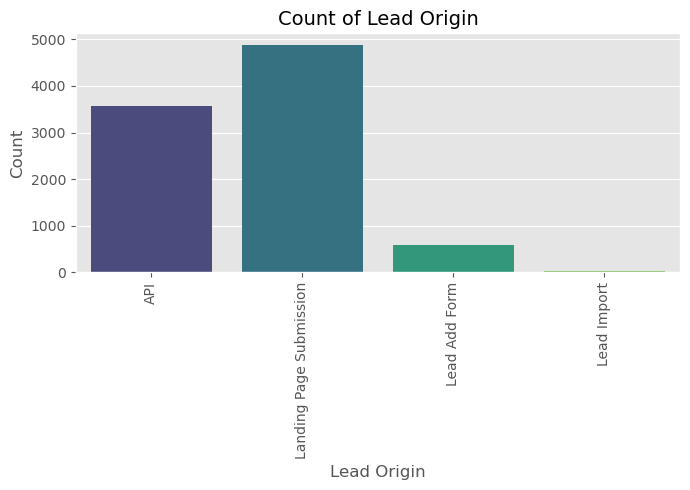

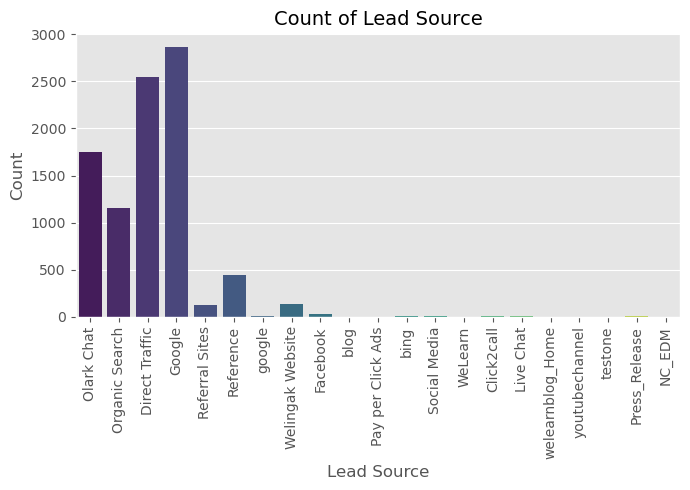

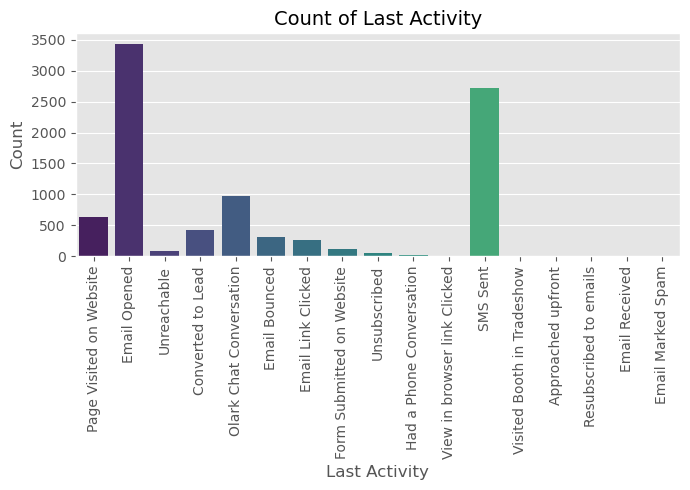

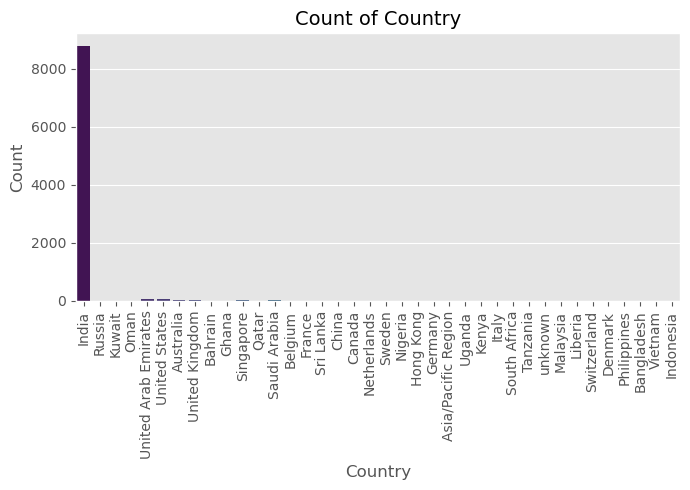

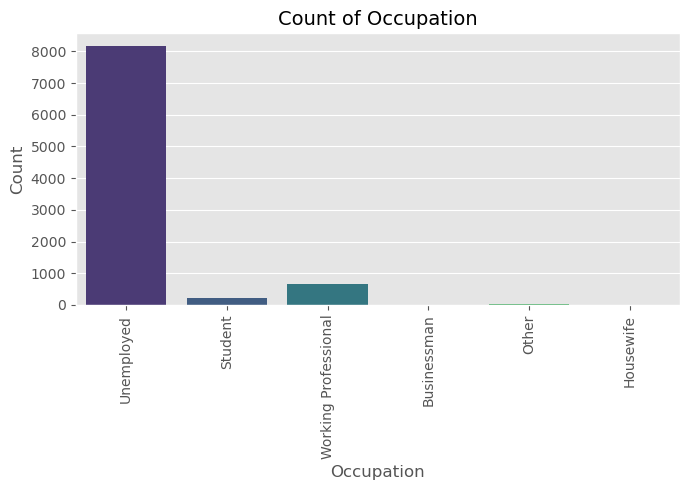

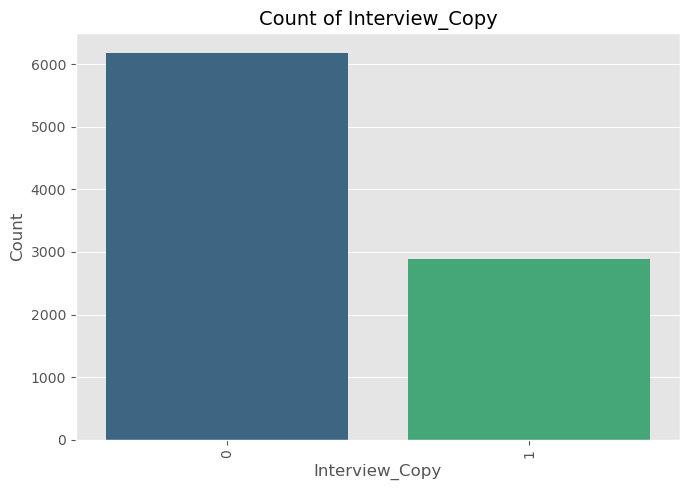

In [1580]:
# Loop through categorical columns and create separate plots
for col in cat_cols:
    plt.figure(figsize=(7, 5))  # Create a new figure for each plot
    
    # Countplot for each categorical variable
    sns.countplot(data=leads_data, x=col, palette="viridis")
    
    # Formatting
    plt.title(f'Count of {col}', fontsize=14)  
    plt.xlabel(col, fontsize=12)             
    plt.ylabel("Count", fontsize=12)           
    plt.xticks(rotation=90, fontsize=10)       

    plt.tight_layout()  # Prevent overlapping layout
    plt.show()  # Show each plot separately

### Insights

1. **Country**: Most leads come from **India**, suggesting a focus on Indian audiences with potential expansion elsewhere.

2. **Interview_Copy**: Those who request the free interview guide show **higher intent**, making them prime targets for personalized follow-ups.

3. **Last Activity**: Website visits and email opens are the most common final actions, indicating the importance of **website content** and **email campaigns**.

4. **Lead Origin**: **Landing Page Submissions** generate the most leads, so optimizing landing pages can further boost conversions.

5. **Lead Source**: **Olark Chat** and **Organic Search** are top channels, emphasizing the need for strong **live chat support** and **SEO** strategies.

6. **Occupation**: The majority of leads are **Unemployed**, highlighting the importance of promoting **career-building** benefits to this group.

### Bivariate Analysis

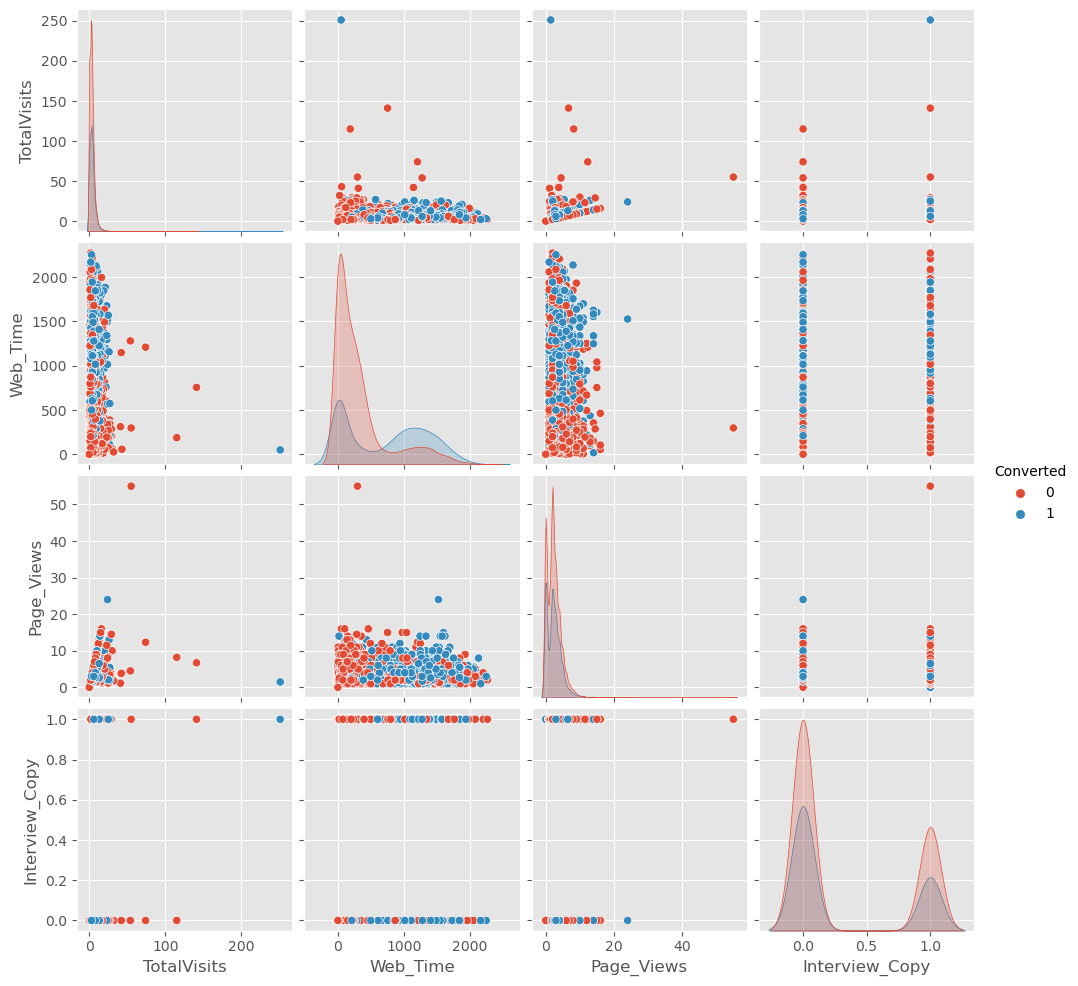

In [1583]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualising the correlations via pairplot for numeric variables
sns.pairplot(leads_data[['TotalVisits','Web_Time','Page_Views','Interview_Copy','Converted']],diag_kind='kde',hue='Converted')
# Save the figure in a folder
plt.show()

### Insights

1. **High Website Engagement → Better Conversions**: More time on site and more page views often lead to higher conversion rates.  
2. **Free Copy Request Signals Intent**: Leads who request “Mastering the Interview” show higher intent and are more likely to convert.  
3. **Web Time & Page Views Correlate**: Visitors who spend more time also view more pages, indicating deeper engagement.  
4. **Total Visits ≠ Guaranteed Conversion**: Frequent visits alone don’t ensure conversion; the quality of engagement matters more.  
5. **Prioritize High-Engagement Leads**: Focus on leads who show multiple signs of interest (e.g., free copy request, long site visits) for targeted follow-ups.

##### For categorical variables with multiple levels, creating dummy features (one-hot encoding)

In [1586]:
# Creating dummy variables for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Occupation','Interview_Copy']], drop_first=True,dtype=int)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [1587]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,TotalVisits,Web_Time,Page_Views,Last Activity,Country,Occupation,Interview_Copy,...,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Copy_1
0,660737,API,Olark Chat,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0
1,660728,API,Organic Search,5.0,674,2.5,Email Opened,India,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,2.0,1532,2.0,Email Opened,India,Student,1,...,0,0,0,0,0,0,1,0,0,1
3,660719,Landing Page Submission,Direct Traffic,1.0,305,1.0,Unreachable,India,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0


In [1588]:
# removing the original columns for which dummy variables have been created
leads_data.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Occupation','Interview_Copy'],axis=1,inplace=True)

In [1589]:
leads_data.shape

(9074, 87)

In [1590]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Lead Number                                 9074 non-null   int64  
 1   TotalVisits                                 9074 non-null   float64
 2   Web_Time                                    9074 non-null   int64  
 3   Page_Views                                  9074 non-null   float64
 4   Converted                                   9074 non-null   int64  
 5   Lead Origin_Landing Page Submission         9074 non-null   int32  
 6   Lead Origin_Lead Add Form                   9074 non-null   int32  
 7   Lead Origin_Lead Import                     9074 non-null   int32  
 8   Lead Source_Direct Traffic                  9074 non-null   int32  
 9   Lead Source_Facebook                        9074 non-null   int32  
 10  Lead Source_Googl

In [1591]:
# Calculating percentage of null values in all the cols
(100*leads_data.isnull().mean()).sort_values(ascending=False)

Lead Number                     0.0
Country_India                   0.0
Country_Nigeria                 0.0
Country_Netherlands             0.0
Country_Malaysia                0.0
                               ... 
Lead Source_youtubechannel      0.0
Lead Source_welearnblog_Home    0.0
Lead Source_testone             0.0
Lead Source_google              0.0
Interview_Copy_1                0.0
Length: 87, dtype: float64

#### Checking outliers for the continuous numeric variables except the dummy variables

In [1593]:
# Checking for outliers in the numeric variables
num_leads = leads_data[['TotalVisits','Web_Time','Page_Views']]

In [1594]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Web_Time,Page_Views
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [1595]:
# visualizing for outliers
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

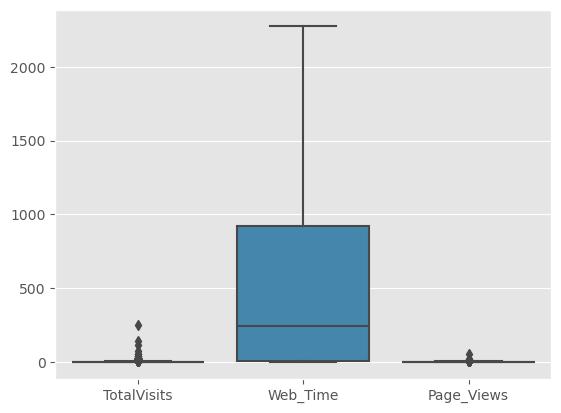

In [1596]:
sns.boxplot(num_leads)

We can see that the columns TotalVisits and Page_Views have outliers

In [1598]:
# Calculating percentage of null values in all the cols
(100*leads_data.isnull().mean()).sort_values(ascending=False)

Lead Number                     0.0
Country_India                   0.0
Country_Nigeria                 0.0
Country_Netherlands             0.0
Country_Malaysia                0.0
                               ... 
Lead Source_youtubechannel      0.0
Lead Source_welearnblog_Home    0.0
Lead Source_testone             0.0
Lead Source_google              0.0
Interview_Copy_1                0.0
Length: 87, dtype: float64

In [1599]:
# List of columns to check for outliers
cols = ['TotalVisits', 'Web_Time', 'Page_Views']

# Start with a boolean mask that is True for all rows
mask = pd.Series(True, index=leads_data.index)

# Loop through each column and update the mask:
# Only keep rows where the value is between the 1st and 99th percentile.
for col in cols:
    # Calculate the 1st and 99th percentiles for the current column
    lower_bound = leads_data[col].quantile(0.01)
    upper_bound = leads_data[col].quantile(0.99)
    print(f"For column '{col}': Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    
    # Update the mask: a row remains True only if its value in this column is within bounds.
    mask &= (leads_data[col] >= lower_bound) & (leads_data[col] <= upper_bound)

# Apply the mask to the entire DataFrame.
# This removes any row that has an outlier in any of the three columns.
leads_data = leads_data[mask].reset_index(drop=True)

print("New shape of leads_data after outlier removal:", leads_data.shape)


For column 'TotalVisits': Lower bound = 0.0, Upper bound = 17.0
For column 'Web_Time': Lower bound = 0.0, Upper bound = 1839.0
For column 'Page_Views': Lower bound = 0.0, Upper bound = 9.0
New shape of leads_data after outlier removal: (8836, 87)


In [1600]:
leads_data[['TotalVisits','Web_Time','Page_Views']].describe(percentiles=[0.25,0.5,0.75,0.90,0.99])

,TotalVisits,Web_Time,Page_Views
count,8836.000000,8836.000000,8836.000000
mean,3.138298,464.593821,2.264855
std,2.897787,526.586843,1.893693
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,3.000000,237.000000,2.000000
75%,5.000000,885.000000,3.000000
90%,7.000000,1342.500000,5.000000
99%,13.000000,1732.000000,8.000000
max,17.000000,1839.000000,9.000000


<Axes: >

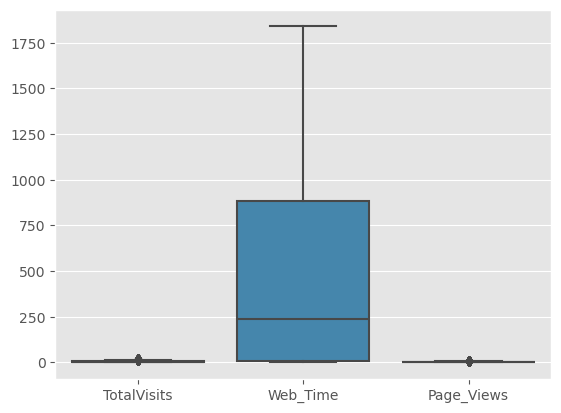

In [1601]:
sns.boxplot(leads_data[['TotalVisits','Web_Time','Page_Views']])

Now we can see that there are negligible number of outliers remaining

In [1603]:
leads_data.shape

(8836, 87)

In [1604]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8836 entries, 0 to 8835
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Lead Number                                 8836 non-null   int64  
 1   TotalVisits                                 8836 non-null   float64
 2   Web_Time                                    8836 non-null   int64  
 3   Page_Views                                  8836 non-null   float64
 4   Converted                                   8836 non-null   int64  
 5   Lead Origin_Landing Page Submission         8836 non-null   int32  
 6   Lead Origin_Lead Add Form                   8836 non-null   int32  
 7   Lead Origin_Lead Import                     8836 non-null   int32  
 8   Lead Source_Direct Traffic                  8836 non-null   int32  
 9   Lead Source_Facebook                        8836 non-null   int32  
 10  Lead Source_

We can see that all the variables are of numeric type now

### Train-Test Split

In [1607]:
from sklearn.model_selection import train_test_split

In [1608]:
# Putting feature variable to X
data = leads_data.copy()

X = leads_data.drop(['Converted'], axis=1)

X.head()

,Lead Number,TotalVisits,Web_Time,Page_Views,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Copy_1
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,660719,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [1609]:
# Putting response variable to y
y = leads_data.Converted

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1610]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1611]:
lead_number_train = X_train['Lead Number']
lead_number_test  = X_test['Lead Number']

# Now drop the Lead Number column from the feature sets that go into modeling.
X_train_model = X_train.drop('Lead Number', axis=1)
X_test_model  = X_test.drop('Lead Number', axis=1)

### Feature Scaling

In [1613]:
from sklearn.preprocessing import StandardScaler

In [1614]:
scaler = StandardScaler()

X_train_model[['TotalVisits','Web_Time','Page_Views']] = scaler.fit_transform(X_train_model[['TotalVisits','Web_Time','Page_Views']])

X_train_model.head()

,TotalVisits,Web_Time,Page_Views,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Copy_1
4802,-0.406859,1.168724,-0.160928,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5402,0.968987,-0.323229,1.940239,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8483,-0.062897,-0.875593,-0.423574,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52,0.968987,-0.344109,-0.423574,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1814,-0.062897,1.449651,-0.423574,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1615]:
### Checking the Lead Conversion Rate
(sum(leads_data['Converted'])/leads_data.shape[0])*100

37.47170665459484

The conversion rate is about 37% which indicates that there is no class imbalance in the dataset.

#### Looking at Correlations

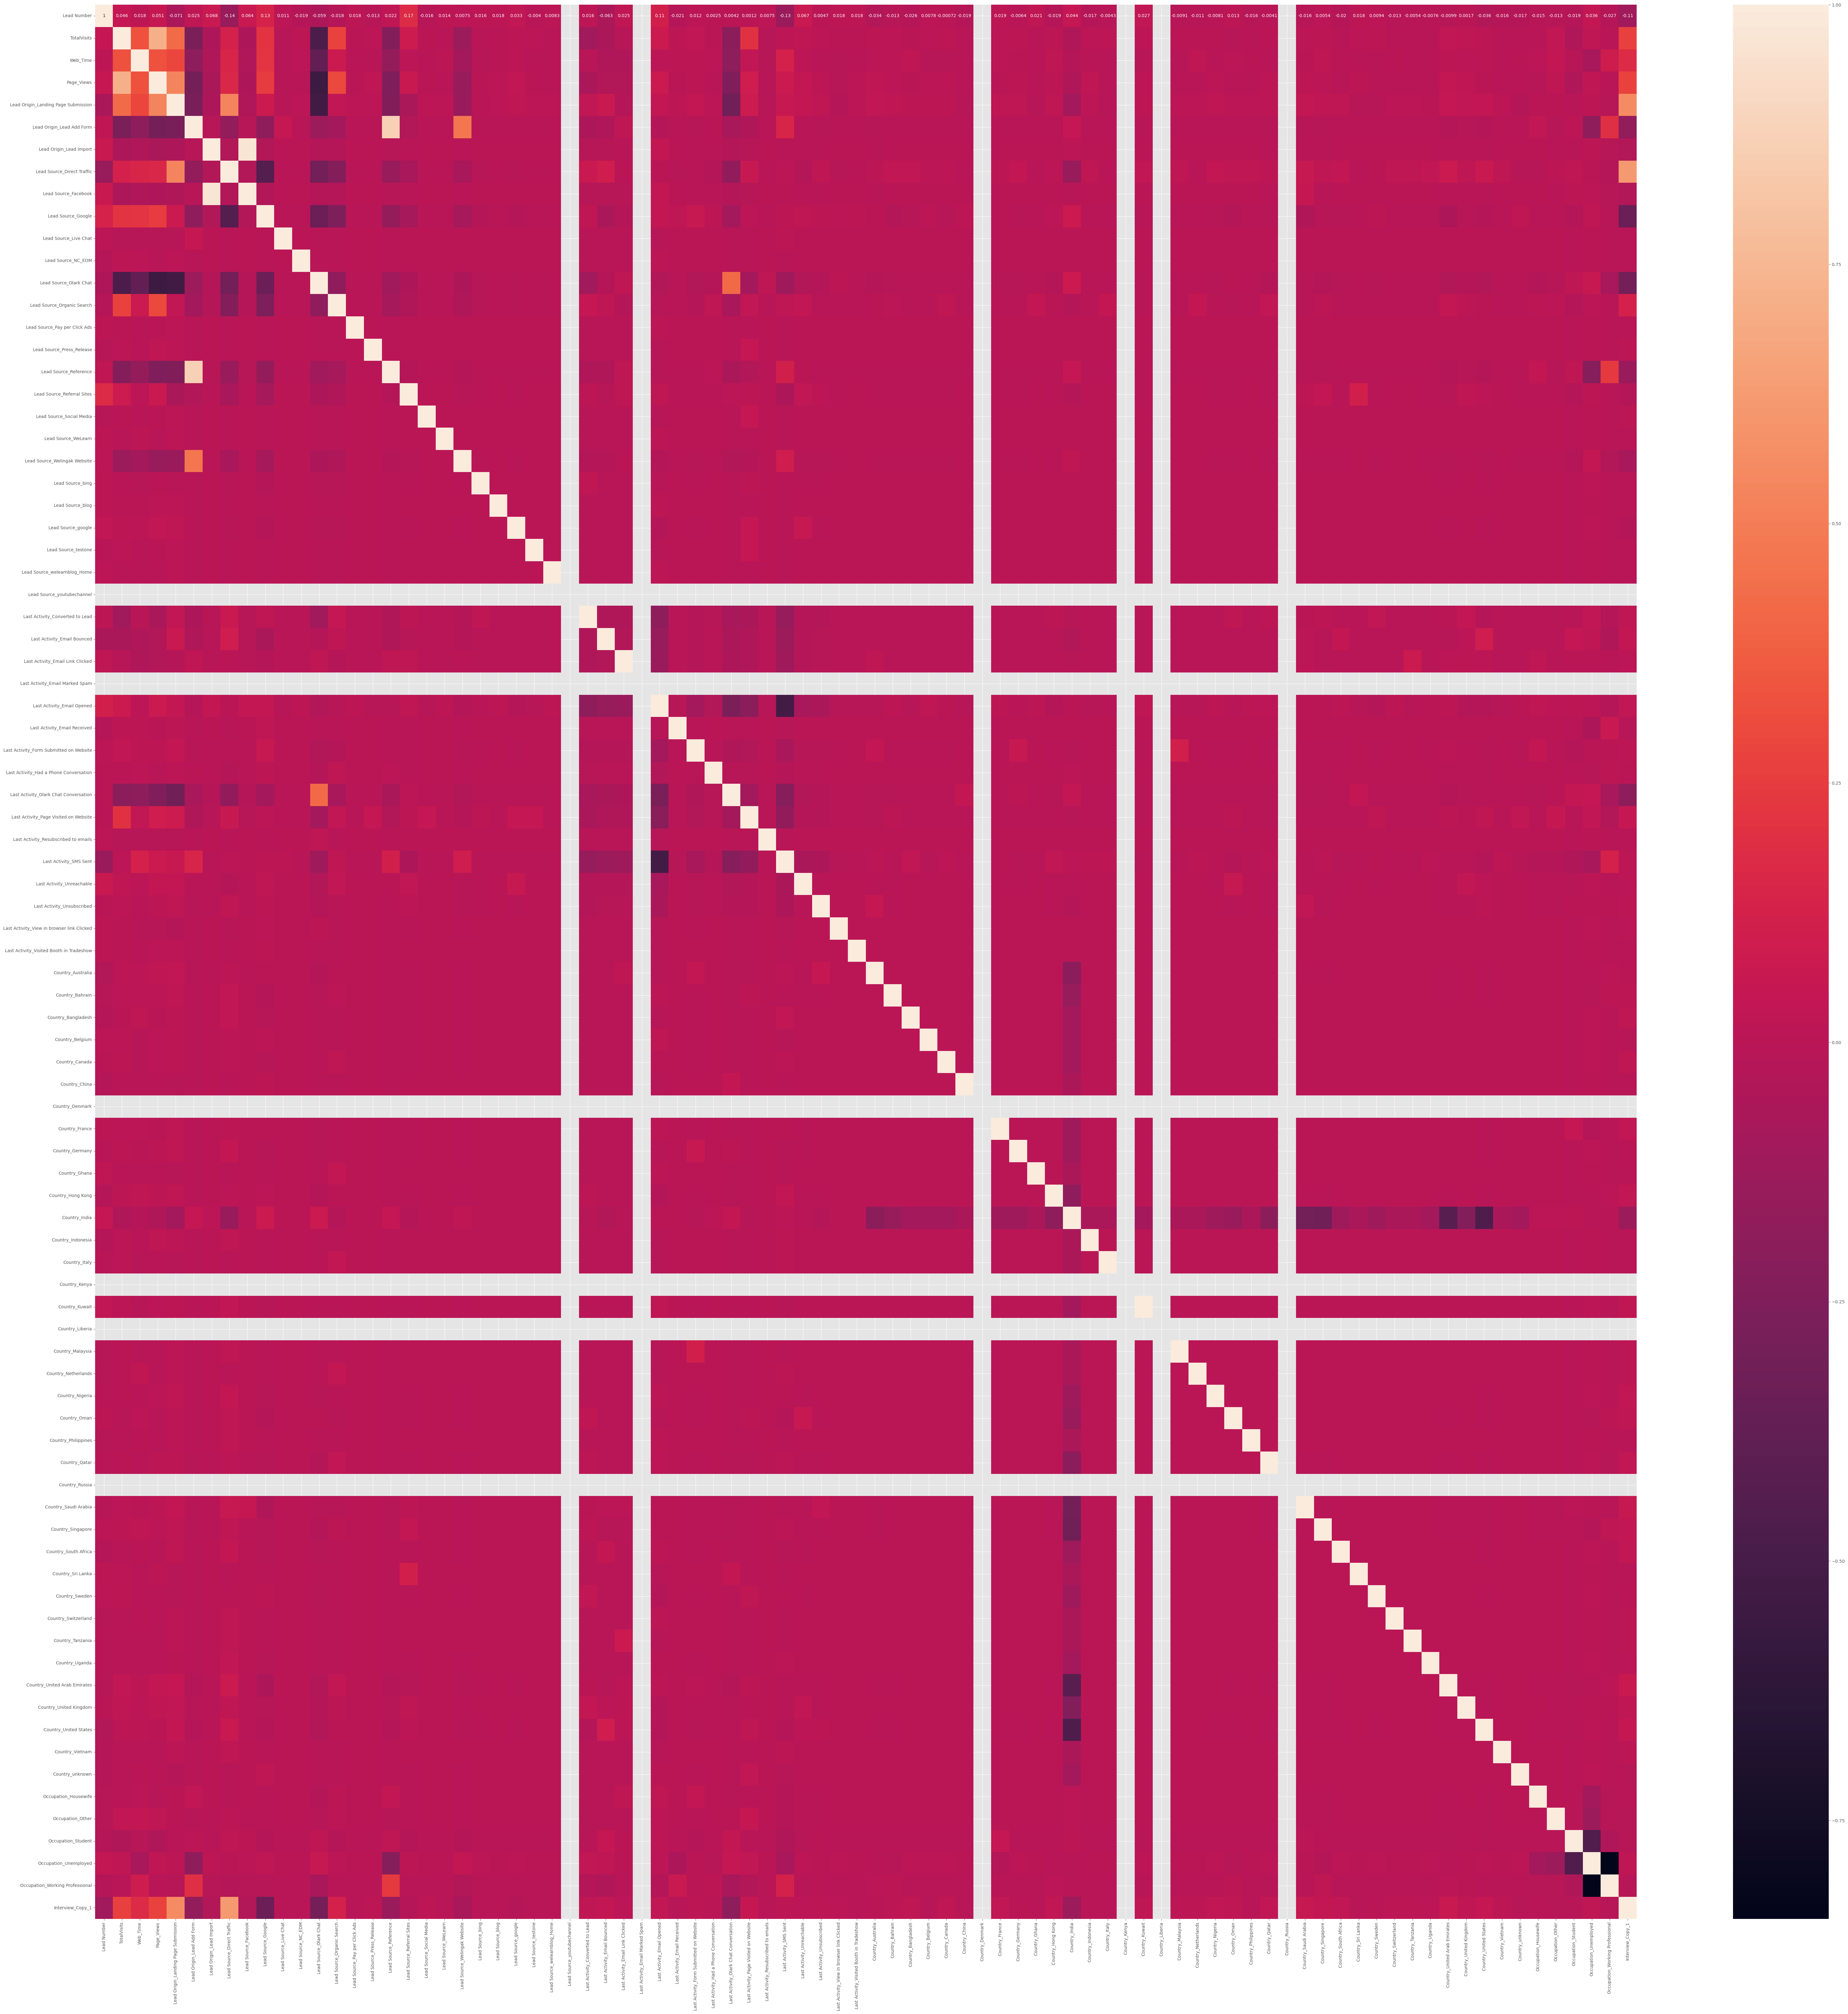

In [1618]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,80))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [1620]:
X_test_model = X_test_model.drop(['Occupation_Working Professional'], axis=1)
X_train_model = X_train_model.drop(['Occupation_Working Professional'], axis=1)

#### Model Building and Automated Feature Selection Using RFE

In [1622]:
import statsmodels.api as sm

In [1623]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1624]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_model, y_train)

In [1625]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False])

In [1626]:
# Convert np.bool_ and np.int64 to native Python types
output = [(col, bool(s), int(r)) for col, s, r in zip(X_train_model.columns, rfe.support_, rfe.ranking_)]
print(output)

[('TotalVisits', False, 26), ('Web_Time', True, 1), ('Page_Views', False, 27), ('Lead Origin_Landing Page Submission', False, 47), ('Lead Origin_Lead Add Form', True, 1), ('Lead Origin_Lead Import', False, 22), ('Lead Source_Direct Traffic', False, 15), ('Lead Source_Facebook', False, 57), ('Lead Source_Google', False, 17), ('Lead Source_Live Chat', False, 52), ('Lead Source_NC_EDM', False, 18), ('Lead Source_Olark Chat', True, 1), ('Lead Source_Organic Search', False, 16), ('Lead Source_Pay per Click Ads', False, 43), ('Lead Source_Press_Release', False, 49), ('Lead Source_Reference', False, 5), ('Lead Source_Referral Sites', False, 33), ('Lead Source_Social Media', False, 56), ('Lead Source_WeLearn', False, 23), ('Lead Source_Welingak Website', True, 1), ('Lead Source_bing', False, 51), ('Lead Source_blog', False, 21), ('Lead Source_google', False, 3), ('Lead Source_testone', False, 46), ('Lead Source_welearnblog_Home', False, 32), ('Lead Source_youtubechannel', False, 65), ('Last Ac

In [1627]:
# 15 best features selected by the recursive feature elimination(RFE)
col = X_train_model.columns[rfe.support_]
print(col)

Index(['Web_Time', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Saudi Arabia',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed'],
      dtype='object')


In [1628]:
# features not selected by rfe
no_col=X_train_model.columns[~rfe.support_]
print(no_col)

Index(['TotalVisits', 'Page_Views', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',

##### Building and Assessing the model with StatsModels

In [1630]:
# building model using the 15 best features selected by rfe
# Model 1
X_train_sm = sm.add_constant(X_train_model[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.6
Date:                Tue, 25 Feb 2025   Deviance:                       5203.3
Time:                        21:00:02   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.4390      0.192      7.503      0.000       1.063       1.815
Web_Time                                    1.1261      0.040     28.248      0.000       1.048       1.204
Lead Origin_Lead Add Form                   4.1666      0.256     16.281      0.000       3.665       4.668
Lead Source_Olark Chat                      1.3728      0.104     13.262      0.000       1.170       1.576
Lead Source_Welingak Website                2.1913      1.041      2.105      0.035       0.151       4.231
Last Activity_Converted to Lead            -1.0747      0.211     -5.103      0.000      -1.488      -0.662
Last Activity_Email Bounced                -2.1721      0.370     -5.873      0.000      -2.897      -1.447
Last Activity_Form Submitted on Website    -1.1011      0.352     -3.131      0.002      -1.790      -0.412
Last Activity_Had a Phone Conversation      1.8134      0.780      2.324      0.020       0.284       3.343
Last Activity_Olark Chat Conversation      -1.5279      0.167     -9.140      0.000      -1.856      -1.200
Last Activity_SMS Sent                      1.3096      0.076     17.303      0.000       1.161       1.458
Last Activity_Unsubscribed                 -0.8655      0.539     -1.605      0.108      -1.922       0.191
Country_Saudi Arabia                       -1.4175      0.753     -1.881      0.060      -2.894       0.059
Occupation_Other                           -2.2084      0.722     -3.058      0.002      -3.624      -0.793
Occupation_Student                         -2.6616      0.302     -8.824      0.000      -3.253      -2.070
Occupation_Unemployed                      -2.9363      0.193    -15.232      0.000      -3.314      -2.559
===========================================================================================================
"""

In [1631]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4802    0.755538
5402    0.915644
8483    0.017789
52      0.031900
1814    0.897763
8572    0.563190
7603    0.754881
3488    0.320242
1173    0.245382
6312    0.874919
dtype: float64

In [1632]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.75553799, 0.91564436, 0.01778861, 0.03189972, 0.89776264,
       0.56318995, 0.75488103, 0.32024191, 0.24538231, 0.87491932])

##### Creating a dataframe with the actual lead converted and the predicted probabilities

In [1634]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Convert_Prob
0,0,0.755538
1,1,0.915644
2,0,0.017789
3,0,0.031900
4,1,0.897763


In [1635]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.755538,1
1,1,0.915644,1
2,0,0.017789,0
3,0,0.031900,0
4,1,0.897763,1


In [1636]:
from sklearn import metrics

In [1637]:
# Create the confusion matrix in a presentable dataframe form
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3421  438]
 [ 718 1608]]


In [1638]:
# Calculating recall and accuracy score on the training data
print('recall --> ', metrics.recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))
print('accuracy --> ', metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

recall -->  0.6913155631986242
accuracy -->  0.8130962004850445


The present recall score for the training set is almost 69%. We are supposed to maintain the recall score around 80%.



#### Checking VIFs for multicollinearity among the independent variables

In [1641]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1642]:
# Model 2
X_train_sm = sm.add_constant(X_train_model[col])
lm = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial()).fit()
print(lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.6
Date:                Tue, 25 Feb 2025   Deviance:                       5203.3
Time:                        21:00:02   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [1643]:
# checking vif again for model 2
df1 = X_train_model[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                   Features   VIF
14                    Occupation_Unemployed  2.08
2                    Lead Source_Olark Chat  1.73
9                    Last Activity_SMS Sent  1.55
1                 Lead Origin_Lead Add Form  1.45
8     Last Activity_Olark Chat Conversation  1.42
3              Lead Source_Welingak Website  1.31
0                                  Web_Time  1.26
4           Last Activity_Converted to Lead  1.10
5               Last Activity_Email Bounced  1.07
13                       Occupation_Student  1.03
6   Last Activity_Form Submitted on Website  1.02
10               Last Activity_Unsubscribed  1.01
7    Last Activity_Had a Phone Conversation  1.00
11                     Country_Saudi Arabia  1.00
12                         Occupation_Other  1.00


In [1644]:
col = col.drop(['Lead Origin_Lead Add Form'],1) # since its vif is 98.39 >> 5
print(f"number of cols : {len(col)}")
print(col)

number of cols : 14
Index(['Web_Time', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Saudi Arabia',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed'],
      dtype='object')


In [1645]:
# Model 3
X_train_sm = sm.add_constant(X_train_model[col])
lm = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial()).fit()
print(lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6170
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2852.3
Date:                Tue, 25 Feb 2025   Deviance:                       5704.5
Time:                        21:00:02   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3310
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [1646]:
# checking vifs again for model 3
df1 = X_train_model[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                   Features   VIF
13                    Occupation_Unemployed  2.06
1                    Lead Source_Olark Chat  1.70
8                    Last Activity_SMS Sent  1.50
7     Last Activity_Olark Chat Conversation  1.42
0                                  Web_Time  1.19
3           Last Activity_Converted to Lead  1.10
4               Last Activity_Email Bounced  1.07
2              Lead Source_Welingak Website  1.05
12                       Occupation_Student  1.03
5   Last Activity_Form Submitted on Website  1.02
9                Last Activity_Unsubscribed  1.01
6    Last Activity_Had a Phone Conversation  1.00
10                     Country_Saudi Arabia  1.00
11                         Occupation_Other  1.00


In [1647]:
col = col.drop(['Country_Saudi Arabia'],1) # since its p value is more than 0.05
print(f"number of cols : {len(col)}")
print(col)

number of cols : 13
Index(['Web_Time', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed'],
      dtype='object')


In [1648]:
# Model 4
X_train_sm = sm.add_constant(X_train_model[col])
lm = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial()).fit()
print(lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6171
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.8
Date:                Tue, 25 Feb 2025   Deviance:                       5709.6
Time:                        21:00:02   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3304
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [1649]:
# checking vifs again for model 4
df1 = X_train_model[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                   Features   VIF
12                    Occupation_Unemployed  2.06
1                    Lead Source_Olark Chat  1.70
8                    Last Activity_SMS Sent  1.50
7     Last Activity_Olark Chat Conversation  1.42
0                                  Web_Time  1.19
3           Last Activity_Converted to Lead  1.10
4               Last Activity_Email Bounced  1.07
2              Lead Source_Welingak Website  1.05
11                       Occupation_Student  1.03
5   Last Activity_Form Submitted on Website  1.02
9                Last Activity_Unsubscribed  1.01
6    Last Activity_Had a Phone Conversation  1.00
10                         Occupation_Other  1.00


Now we can see that no p values are more than 0.05 and all the vifs are less than 3. So no need to drop any other feature now.

In [1651]:
y_train_pred_final_new = pd.DataFrame({'Converted':y_train.values})
y_train_pred_final_new.head()

,Converted
0,0
1,1
2,0
3,0
4,1


In [1652]:
# predicting the probabilities using the updated model
y_train_pred_new = lm.predict(X_train_sm).values.reshape(-1)

In [1653]:
y_train_pred_final_new['Convert_Prob'] = y_train_pred_new
y_train_pred_final_new.head()

,Converted,Convert_Prob
0,0,0.757045
1,1,0.955709
2,0,0.028368
3,0,0.044964
4,1,0.885754


In [1654]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.
# 0.5 being a random cutoff  probability threshold.
y_train_pred_final_new['predicted'] = y_train_pred_final_new.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_new.head()

,Converted,Convert_Prob,predicted
0,0,0.757045,1
1,1,0.955709,1
2,0,0.028368,0
3,0,0.044964,0
4,1,0.885754,1


In [1655]:
# constructing the confusion matrix using the updated model(Model 4)
cm=metrics.confusion_matrix(y_train_pred_final_new.Converted,y_train_pred_final_new.predicted)
print(cm)

[[3406  453]
 [ 862 1464]]


In [1656]:
# Calculating final recall and accuracy score on the training data
print('recall --> ', metrics.recall_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['predicted']))
print('accuracy --> ', metrics.accuracy_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['predicted']))
# Extract true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP)
TN, FP, FN, TP = cm.ravel()

# Calculate specificity: TN / (TN + FP)
specificity = TN / (TN + FP)
print('specificity --> ', specificity)

recall -->  0.6294067067927773
accuracy -->  0.7873888439773646
specificity -->  0.8826120756672713


It seems that after deleting few features also, the recall almost remains the same. So we need to try changing the cut_off probablility keeping in mind the target recall score of around 80%

### Plotting the ROC Curve

In [1659]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    # Save the figure before showing it
    plt.show()


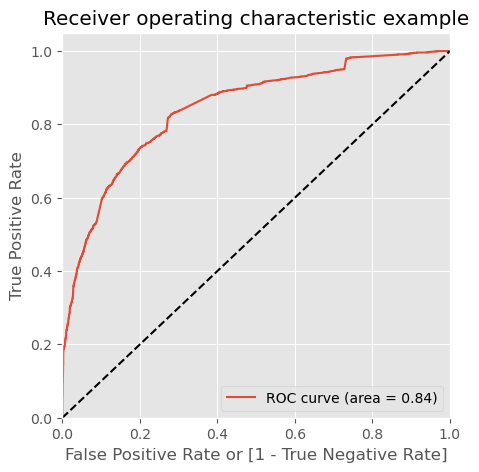

In [1660]:
# roc curve for the updated model (Model 4)
draw_roc(y_train_pred_final_new.Converted, y_train_pred_final_new.Convert_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy,sensitivity and specificity

In [1663]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_new[i]= y_train_pred_final_new.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_new.head()

,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.757045,1,1,1,1,1,1,1,1,1,0,0
1,1,0.955709,1,1,1,1,1,1,1,1,1,1,1
2,0,0.028368,0,1,0,0,0,0,0,0,0,0,0
3,0,0.044964,0,1,0,0,0,0,0,0,0,0,0
4,1,0.885754,1,1,1,1,1,1,1,1,1,1,0


In [1664]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_new.Converted, y_train_pred_final_new[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376071  1.000000  0.000000
0.1   0.1  0.531124  0.981083  0.259912
0.2   0.2  0.683751  0.894669  0.556621
0.3   0.3  0.759256  0.826741  0.718580
0.4   0.4  0.776233  0.722270  0.808759
0.5   0.5  0.787389  0.629407  0.882612
0.6   0.6  0.769281  0.500430  0.931329
0.7   0.7  0.755699  0.420894  0.957502
0.8   0.8  0.726597  0.311264  0.976937
0.9   0.9  0.693775  0.195185  0.994299


From the above it is clear that our previous cutoff of 0.5 was not optimal. Instead something around 0.3 would be a better choice.

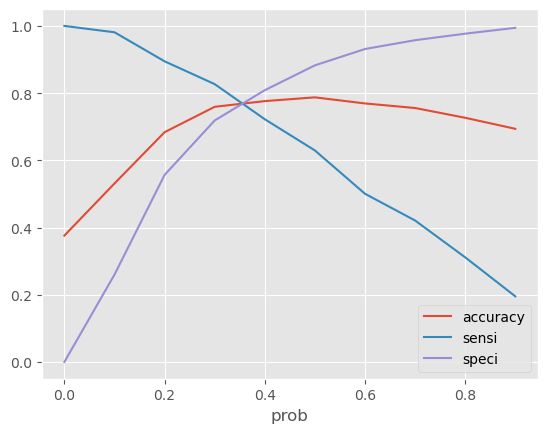

In [1666]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

so around 0.33 cutoff would be better. lets try the cutoff 0.33

In [1668]:
# Changing the cutoff to 0.33
y_train_pred_final_new['final_predicted'] = y_train_pred_final_new.Convert_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final_new.head(10)

,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.757045,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.955709,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.028368,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.044964,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.885754,1,1,1,1,1,1,1,1,1,1,0,1
5,1,0.607921,1,1,1,1,1,1,1,1,0,0,0,1
6,1,0.706945,1,1,1,1,1,1,1,1,1,0,0,1
7,0,0.409705,0,1,1,1,1,1,0,0,0,0,0,1
8,0,0.248412,0,1,1,1,0,0,0,0,0,0,0,0
9,1,0.187159,0,1,1,0,0,0,0,0,0,0,0,0


In [1669]:
# creating the confusion matrix for the updated cutoff 
cm1=metrics.confusion_matrix(y_train_pred_final_new.Converted,y_train_pred_final_new.final_predicted)
print(cm1)

[[2828 1031]
 [ 507 1819]]


In [1670]:
# Calculating final recall and accuracy score on the training data
print('recall --> ', metrics.recall_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted']))
print('accuracy --> ', metrics.accuracy_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted']))
# Extract true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP)
TN, FP, FN, TP = cm1.ravel()

# Calculate specificity: TN / (TN + FP)
specificity = TN / (TN + FP)
print('specificity --> ', specificity)

recall -->  0.7820292347377472
accuracy -->  0.7513338722716248
specificity -->  0.732832339984452


so from the above we can see that we have achieved the recall as 80%.

In [1672]:
y_train_pred = lm.predict(X_train_sm)

# Create a DataFrame for the training set results, ensuring all series are of equal length
train_results = pd.DataFrame({
    'Lead Number': lead_number_train,                     # should have the same length as X_train_model
    'Converted': y_train,                                 # actual conversion values from training set
    'Convert_Prob': y_train_pred,                         # predicted probabilities from the model
    'Final_Predicted': [1 if x > 0.33 else 0 for x in y_train_pred],  # applying cutoff 0.33
    'Lead_Score': (y_train_pred * 100).round(0)           # calculating lead score and rounding off
})

print(train_results.head())

      Lead Number  Converted  Convert_Prob  Final_Predicted  Lead_Score
4802       611595          0      0.757045                1        76.0
5402       606643          1      0.955709                1        96.0
8483       582225          0      0.028368                0         3.0
52         660050          0      0.044964                0         4.0
1814       641008          1      0.885754                1        89.0


In [1673]:
# Verifying recall(sensitivity), specificity and accuracy for train_results
print(f'recall --> {metrics.recall_score(train_results.Converted,train_results.Final_Predicted)}')
print(f'specificity --> {metrics.recall_score(train_results.Converted,train_results.Final_Predicted,pos_label=0)}')
print(f'accuracy --> {metrics.accuracy_score(train_results.Converted,train_results.Final_Predicted)}')

recall --> 0.7820292347377472
specificity --> 0.732832339984452
accuracy --> 0.7513338722716248


In [1674]:
from sklearn.metrics import precision_score, recall_score

In [1675]:
precision_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted'])

0.6382456140350877

In [1676]:
recall_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted'])

0.7820292347377472

### Step 11: Making predictions on the test set

In [1678]:
# transforming the numeric variables in testing data using standard scaler
X_test_model[['TotalVisits','Web_Time','Page_Views']] = scaler.transform(X_test_model[['TotalVisits','Web_Time','Page_Views']])

In [1679]:
# using the same 15 cols in testing selected by rfe
X_test_model = X_test_model[col]
X_test_model.head()

,Web_Time,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Occupation_Other,Occupation_Student,Occupation_Unemployed
5648,-0.886982,1,0,0,0,0,0,1,0,0,0,0,1
3821,-0.886982,1,0,0,0,0,0,0,0,0,0,0,1
3990,-0.674388,0,0,0,0,0,0,0,1,0,0,0,1
2596,0.506266,0,0,0,0,0,0,0,0,0,0,0,0
3267,0.916269,0,0,0,0,0,0,0,0,0,0,0,1


In [1680]:
#Adding a constant column
X_test_sm = sm.add_constant(X_test_model)

Making predictions on the test set

In [1682]:
# predicting the probabilities using the final model
y_test_pred = lm.predict(X_test_sm)

In [1683]:
y_test_pred[:10]

5648    0.066558
3821    0.248412
3990    0.372740
2596    0.925448
3267    0.403945
732     0.168603
2029    0.333023
6003    0.362291
3946    0.989783
7139    0.994344
dtype: float64

In [1684]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1685]:
# Let's see the head
y_pred_1.head()

,0
5648,0.066558
3821,0.248412
3990,0.372740
2596,0.925448
3267,0.403945


In [1686]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1687]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1688]:
y_pred_final.rename(columns={0:'Convert_Prob'},inplace=True)

In [1689]:
y_pred_final.head()

,Converted,Convert_Prob
5648,0,0.066558
3821,1,0.248412
3990,0,0.372740
2596,1,0.925448
3267,1,0.403945


In [1690]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [1691]:
y_pred_final.head()

,Converted,Convert_Prob,final_predicted
5648,0,0.066558,0
3821,1,0.248412,0
3990,0,0.372740,1
2596,1,0.925448,1
3267,1,0.403945,1


In [1692]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1204,  462],
       [ 236,  749]], dtype=int64)

In [1693]:
# Calculating final recall and accuracy score on the testing data
print('recall --> ', metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('accuracy --> ', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('specificity --> ', metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted,pos_label=0))

recall -->  0.7604060913705584
accuracy -->  0.7367031308940023
specificity -->  0.7226890756302521


From the above we can see that the recall on the test data comes as 80.2% which is very close to the recall on the training data. This indicates the model is perfectly ok.

Now assigning a lead score for every lead number in the dataset. We are multiplying the Convert_Prob column by 100 thus obtaining the required lead score.  

In [1696]:
# Generate predicted probabilities using your logistic regression model
y_test_pred = lm.predict(X_test_sm)

# Create the test results DataFrame ensuring all series have matching lengths
test_results = pd.DataFrame({
    'Lead Number': lead_number_test,
    'Converted': y_test,  # actual conversion status from test set
    'Convert_Prob': y_test_pred,
    'Final_Predicted': [1 if prob > 0.33 else 0 for prob in y_test_pred],
    'Lead_Score': (y_test_pred * 100).round(0)
})

print(test_results.head())

      Lead Number  Converted  Convert_Prob  Final_Predicted  Lead_Score
5648       604582          0      0.066558                0         7.0
3821       621471          1      0.248412                0        25.0
3990       619761          0      0.372740                1        37.0
2596       633312          1      0.925448                1        93.0
3267       627307          1      0.403945                1        40.0


In [1697]:
final_results = pd.concat([train_results, test_results], axis=0).reset_index(drop=True)

# 'final_results' now clearly shows each Lead Number with its corresponding lead score.
print(final_results.head(10))

   Lead Number  Converted  Convert_Prob  Final_Predicted  Lead_Score
0       611595          0      0.757045                1        76.0
1       606643          1      0.955709                1        96.0
2       582225          0      0.028368                0         3.0
3       660050          0      0.044964                0         4.0
4       641008          1      0.885754                1        89.0
5       581625          1      0.607921                1        61.0
6       588850          1      0.706945                1        71.0
7       624965          0      0.409705                1        41.0
8       646545          0      0.248412                0        25.0
9       599075          1      0.187159                0        19.0


### Conclusion

- Based on our analysis, 0.33 emerged as the optimal probability cutoff, balancing recall, precision, and accuracy for the lead conversion model. 


- At this threshold, leads receive a Lead Score of 33 or higher and are deemed “hot.” Our model demonstrates approximately
  80% recall on both training and test data, indicating it effectively captures the majority of likely converters without
  significantly inflating false positives.
  

- Consequently, we recommend prioritizing outreach to leads with scores ≥ 33, as they have a high likelihood of conversion.
  However, this threshold can be revisited if business objectives change—such as aiming to reduce the number of calls (requiring
  higher precision) or ensuring fewer missed opportunities (requiring higher recall). Regularly reviewing the model’s     performance and adjusting the cutoff as needed will help maintain alignment with organizational goals.